# Data Visualization

<br>

__Technical Notebook -__  Module 1 Microsoft Project <br />
__Data Scientists -__  Nathan Venos, Max Tingle <br />
__Flatiron School -__ DC Data Science Fellowship

<br>


In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [178]:
df = pd.read_csv('Data/cleaned_dataframe.csv')

In [179]:
df.head()

,primary_title,runtime_minutes,genres,average_rating,num_votes,directors,writers,studio,year,release_date,...,horror,music,musical,mystery,romance,sci_fi,sport,thriller,war,western
0,The Secret Life of Walter Mitty,114.0,"['Adventure', 'Comedy', 'Drama']",7.3,275300.0,nm0001774,"nm0175726,nm0862122",Fox,2013,2013-12-25,...,False,False,False,False,False,False,False,False,False,False
1,A Walk Among the Tombstones,114.0,"['Action', 'Crime', 'Drama']",6.5,105116.0,nm0291082,"nm0088747,nm0291082",Uni.,2014,2014-09-19,...,False,False,False,False,False,False,False,False,False,False
2,Jurassic World,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",Uni.,2015,2015-06-12,...,False,False,False,False,False,True,False,False,False,False
3,The Rum Diary,119.0,"['Comedy', 'Drama']",6.2,94787.0,nm0732430,"nm0732430,nm0860219",FD,2011,2011-10-28,...,False,False,False,False,False,False,False,False,False,False
4,The Three Stooges,92.0,"['Comedy', 'Family']",5.1,28570.0,"nm0268380,nm0268370","nm0148808,nm0268370,nm0268380",Fox,2012,2012-04-13,...,False,False,False,False,False,False,False,False,False,False


In [180]:
df.columns

Index(['primary_title', 'runtime_minutes', 'genres', 'average_rating',
       'num_votes', 'directors', 'writers', 'studio', 'year', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross',
       'foreign_gross', 'action', 'adventure', 'animation', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sci_fi',
       'sport', 'thriller', 'war', 'western'],
      dtype='object')

In [181]:
# creating a column of new metric that multiplies average_rating by num_votes
df['rating_votes'] = df['average_rating'] * df['num_votes']

In [182]:
df['profit'] = df['worldwide_gross'] - df['production_budget']

In [183]:
df['action_or_adven_and_anime'] = (df['action'] & df['animation']) | (df['adventure'] & df['animation'])

In [184]:
len(df.studio.unique())

80

In [185]:
df.studio.value_counts().tail(20)

Viv.           1
GrtIndia       1
Orch.          1
SMod           1
ATO            1
LD             1
Neon           1
Cleopatra      1
Global Road    1
EOne           1
ENTMP          1
Alc            1
BSC            1
IM             1
VE             1
Drft.          1
Saban          1
KE             1
Relbig.        1
P4             1
Name: studio, dtype: int64

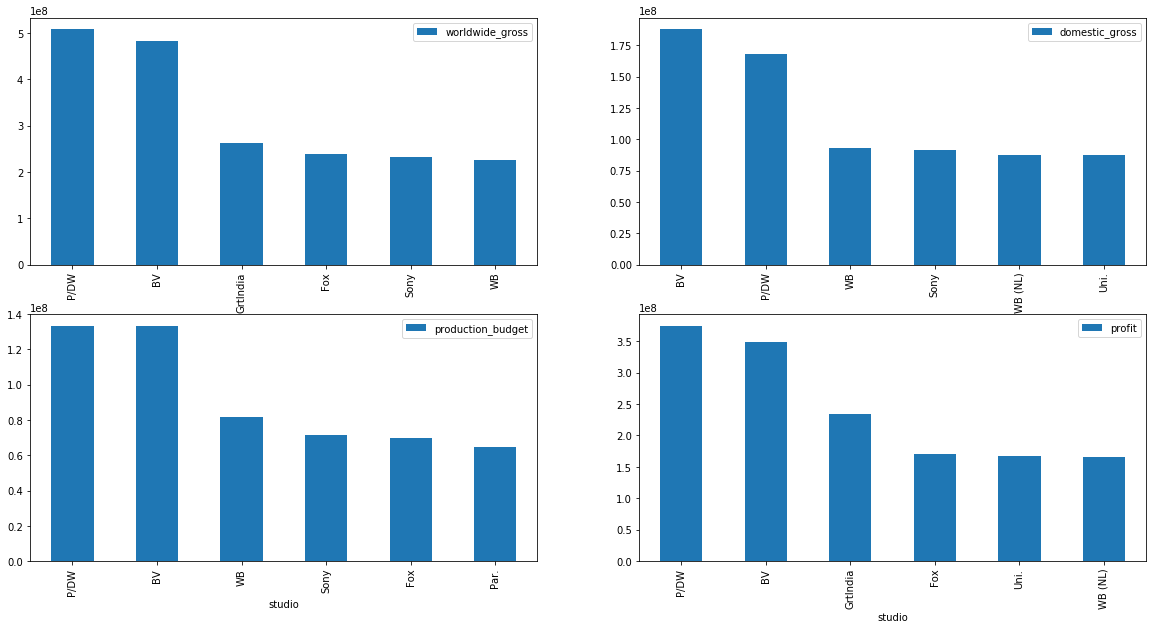

In [186]:
# Plotting a series of financial metrics
# P/DW and BV are clearly the best performing
# WB and Fox also appear in the top 6 in worldwide_gross, profit and rating*votes, 
# which were our primary metrics for success.
# Those 4 were selected for deeper analysis
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(221)
df[['worldwide_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['worldwide_gross'], ascending=False).head(6).plot.bar(ax=ax1)

ax2 = plt.subplot(222)
df[['domestic_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['domestic_gross'], ascending=False).head(6).plot.bar(ax=ax2)

ax3 = plt.subplot(223)
df[['production_budget', 'studio']].groupby(['studio']).mean().sort_values(
    by=['production_budget'], ascending=False).head(6).plot.bar(ax=ax3)

ax4 = plt.subplot(224)
df[['profit', 'studio']].groupby(['studio']).mean().sort_values(
    by=['profit'], ascending=False).head(6).plot.bar(ax=ax4)

plt.subplots_adjust(wspace=0.2)

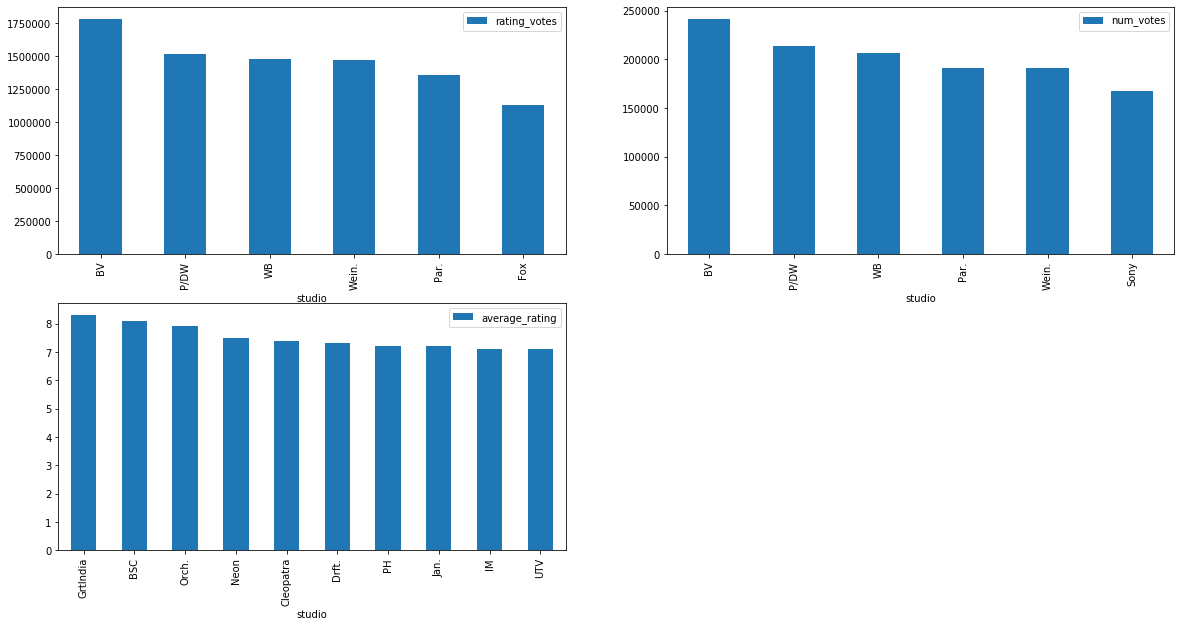

In [187]:
# Plotting a series of engagement metrics.
# highest average rating alone introduces many small studios 
# that we don't think are as informative to Microsoft,
# so we're focusing on rating_votes
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(221)
df[['rating_votes', 'studio']].groupby(['studio']).mean().sort_values(
    by=['rating_votes'], ascending=False).head(6).plot.bar(ax=ax1)

ax2 = plt.subplot(222)
df[['num_votes', 'studio']].groupby(['studio']).mean().sort_values(
    by=['num_votes'], ascending=False).head(6).plot.bar(ax=ax2)

ax3 = plt.subplot(223)
df[['average_rating', 'studio']].groupby(['studio']).mean().sort_values(
    by=['average_rating'], ascending=False).head(10).plot.bar(ax=ax3)

plt.subplots_adjust(wspace=0.2)

In [188]:
top_studios = ['P/DW','BV','Fox','WB']

In [189]:
top_studios_df = df.loc[df.studio.isin(top_studios)]

In [190]:
df.animation.value_counts()

False    1133
True       93
Name: animation, dtype: int64

In [191]:
top_studios_df.loc[top_studios_df.studio == 'BV'].sort_values(
    by='worldwide_gross', ascending=False)

,primary_title,runtime_minutes,genres,average_rating,num_votes,directors,writers,studio,year,release_date,...,mystery,romance,sci_fi,sport,thriller,war,western,rating_votes,profit,action_or_adven_and_anime
1080,Avengers: Infinity War,149.0,"['Action', 'Adventure', 'Sci-Fi']",8.5,670926.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",BV,2018,2018-04-27,...,False,False,True,False,False,False,False,5702871.0,1.748134e+09,False
855,Avengers: Age of Ultron,141.0,"['Action', 'Adventure', 'Sci-Fi']",7.3,665594.0,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",BV,2015,2015-05-01,...,False,False,True,False,False,False,False,4858836.2,1.072414e+09,False
642,Black Panther,134.0,"['Action', 'Adventure', 'Sci-Fi']",7.3,516148.0,nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",BV,2018,2018-02-16,...,False,False,True,False,False,False,False,3767880.4,1.148258e+09,False
813,Frozen,102.0,"['Adventure', 'Animation', 'Comedy']",7.5,516998.0,"nm0118333,nm1601644","nm1601644,nm0026153,nm0118333,nm2280850",BV,2013,2013-11-22,...,False,False,False,False,False,False,False,3877485.0,1.122470e+09,True
925,Beauty and the Beast,129.0,"['Family', 'Fantasy', 'Musical']",7.2,238325.0,nm0174374,"nm0154716,nm0818746,nm0941314,nm0207305,nm3343855",BV,2017,2017-03-17,...,False,False,False,False,False,False,False,1715940.0,1.099200e+09,False
1028,Incredibles 2,118.0,"['Action', 'Adventure', 'Animation']",7.7,203510.0,nm0083348,nm0083348,BV,2018,2018-06-15,...,False,False,False,False,False,False,False,1567027.0,1.042521e+09,True
266,Iron Man 3,130.0,"['Action', 'Adventure', 'Sci-Fi']",7.2,692794.0,nm0000948,"nm1510800,nm0000948,nm0498278,nm1411347,nm1293...",BV,2013,2013-05-03,...,False,False,True,False,False,False,False,4988116.8,1.015392e+09,False
1013,Captain America: Civil War,147.0,"['Action', 'Adventure', 'Sci-Fi']",7.8,583507.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0800209,nm0456158,nm2092...",BV,2016,2016-05-06,...,False,False,True,False,False,False,False,4551354.6,8.900694e+08,False
12,Toy Story 3,103.0,"['Adventure', 'Animation', 'Comedy']",8.3,682218.0,nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",BV,2010,2010-06-18,...,False,False,False,False,False,False,False,5662409.4,8.688795e+08,True
1045,Rogue One: A Star Wars Story,133.0,"['Action', 'Adventure', 'Sci-Fi']",7.8,478592.0,nm2284484,"nm0919363,nm0006904,nm0461306,nm1729428,nm0000184",BV,2016,2016-12-16,...,False,False,True,False,False,False,False,3733017.6,8.491029e+08,False


In [192]:
top_studios_df.loc[top_studios_df.studio ==
                   'P/DW'].sort_values(by='worldwide_gross', ascending=False)

,primary_title,runtime_minutes,genres,average_rating,num_votes,directors,writers,studio,year,release_date,...,mystery,romance,sci_fi,sport,thriller,war,western,rating_votes,profit,action_or_adven_and_anime
335,Transformers: Dark of the Moon,154.0,"['Action', 'Adventure', 'Sci-Fi']",6.2,366409.0,nm0000881,nm0472567,P/DW,2011,2011-06-29,...,False,False,True,False,False,False,False,2271735.8,928790543.0,False
87,Shrek Forever After,93.0,"['Adventure', 'Animation', 'Comedy']",6.3,167532.0,nm0593610,"nm0825308,nm0458441,nm0501359,nm0011470,nm0254...",P/DW,2010,2010-05-21,...,False,False,False,False,False,False,False,1055451.6,591244673.0,True
252,Madagascar 3: Europe's Most Wanted,93.0,"['Adventure', 'Animation', 'Comedy']",6.8,146858.0,"nm0569891,nm0970447,nm0201509","nm0201509,nm0000876,nm0123666,nm0405190,nm0569...",P/DW,2012,2012-06-08,...,False,False,False,False,False,False,False,998634.4,601921271.0,True
267,Kung Fu Panda 2,90.0,"['Action', 'Adventure', 'Animation']",7.2,228465.0,nm0950775,"nm0008743,nm0074184,nm0717550,nm0903456",P/DW,2011,2011-05-26,...,False,False,False,False,False,False,False,1644948.0,514837547.0,True
15,Puss in Boots,90.0,"['Action', 'Adventure', 'Animation']",6.6,133355.0,nm3735491,"nm1117226,nm0528244,nm0204030,nm0011470,nm0674...",P/DW,2011,2011-10-28,...,False,False,False,False,False,False,False,880143.0,424987477.0,True
86,How to Train Your Dragon,98.0,"['Action', 'Adventure', 'Animation']",8.1,611299.0,"nm0761498,nm0213450","nm0204030,nm0213450,nm0761498,nm2441763,nm0405...",P/DW,2010,2010-03-26,...,False,False,False,False,False,False,False,4951521.9,329870992.0,True
114,Megamind,95.0,"['Action', 'Animation', 'Comedy']",7.3,207488.0,nm0569891,"nm0774786,nm2523794",P/DW,2010,2010-11-05,...,False,False,False,False,False,False,False,1514662.4,191887208.0,True
374,Rise of the Guardians,97.0,"['Action', 'Adventure', 'Animation']",7.3,145281.0,nm0709056,"nm1865755,nm0431622",P/DW,2012,2012-11-21,...,False,False,False,False,False,False,False,1060551.3,161900902.0,True
7,Dinner for Schmucks,114.0,['Comedy'],5.9,91546.0,nm0005366,"nm1115862,nm1911349,nm0891554",P/DW,2010,2010-07-30,...,False,False,False,False,False,False,False,540121.4,17796502.0,False
42,A Thousand Words,91.0,"['Comedy', 'Drama']",5.9,36387.0,nm0005367,nm0466175,P/DW,2012,2012-03-09,...,False,False,False,False,False,False,False,214683.3,-19209514.0,False


In [193]:
top_studios_df.loc[top_studios_df.studio == 'WB'].sort_values(
    by='worldwide_gross', ascending=False)

,primary_title,runtime_minutes,genres,average_rating,num_votes,directors,writers,studio,year,release_date,...,mystery,romance,sci_fi,sport,thriller,war,western,rating_votes,profit,action_or_adven_and_anime
396,Aquaman,143.0,"['Action', 'Adventure', 'Fantasy']",7.1,263328.0,nm1490123,"nm0424901,nm3263825,nm0424315,nm1490123,nm3542...",WB,2018,2018-12-21,...,False,False,False,False,False,False,False,1869628.8,986894640.0,False
302,The Dark Knight Rises,164.0,"['Action', 'Thriller']",8.4,1387769.0,nm0634240,"nm0634300,nm0634240,nm0333060,nm0004170",WB,2012,2012-07-20,...,False,False,False,False,True,False,False,11657259.6,809439099.0,False
953,Batman v Superman: Dawn of Justice,151.0,"['Action', 'Adventure', 'Fantasy']",6.5,576909.0,nm0811583,"nm0006516,nm0333060,nm0004170,nm0277730,nm0796...",WB,2016,2016-03-25,...,False,False,False,False,False,False,False,3749908.5,617500281.0,False
316,Inception,148.0,"['Action', 'Adventure', 'Sci-Fi']",8.8,1841066.0,nm0634240,nm0634240,WB,2010,2010-07-16,...,False,False,True,False,False,False,False,16201380.8,675524642.0,False
16,Wonder Woman,141.0,"['Action', 'Adventure', 'Fantasy']",7.5,487527.0,nm0420941,"nm0374302,nm0811583,nm0297229,nm0551376,nm4243936",WB,2017,2017-06-02,...,False,False,False,False,False,False,False,3656452.5,671133378.0,False
976,Fantastic Beasts and Where to Find Them,132.0,"['Adventure', 'Family', 'Fantasy']",7.3,365353.0,nm0946734,nm0746830,WB,2016,2016-11-18,...,False,False,False,False,False,False,False,2667076.9,622402853.0,False
321,Suicide Squad,123.0,"['Action', 'Adventure', 'Fantasy']",6.0,533039.0,nm0043742,"nm0043742,nm1694619",WB,2016,2016-08-05,...,False,False,False,False,False,False,False,3198234.0,571059887.0,False
380,Gravity,91.0,"['Drama', 'Sci-Fi', 'Thriller']",7.7,710018.0,nm0190859,"nm0190859,nm0190861,nm0000123",WB,2013,2013-10-04,...,False,False,True,False,True,False,False,5467138.6,583698673.0,False
45,Man of Steel,143.0,"['Action', 'Adventure', 'Sci-Fi']",7.1,647288.0,nm0811583,"nm0333060,nm0634240,nm0796950,nm0795975",WB,2013,2013-06-14,...,False,False,True,False,False,False,False,4595744.8,442999518.0,False
104,Justice League,120.0,"['Action', 'Adventure', 'Fantasy']",6.5,329135.0,nm0811583,"nm0796950,nm0795975,nm0006516,nm0811583,nm0923...",WB,2017,2017-11-17,...,False,False,False,False,False,False,False,2139377.5,355945209.0,False


In [194]:
top_studios_df.loc[top_studios_df.studio == 'Fox'].sort_values(
    by='worldwide_gross', ascending=False)

,primary_title,runtime_minutes,genres,average_rating,num_votes,directors,writers,studio,year,release_date,...,mystery,romance,sci_fi,sport,thriller,war,western,rating_votes,profit,action_or_adven_and_anime
595,Bohemian Rhapsody,134.0,"['Biography', 'Drama', 'Music']",8.0,345466.0,nm0001741,"nm0565026,nm0604948",Fox,2018,2018-11-02,...,False,False,False,False,False,False,False,2763728.0,839985342.0,False
561,Ice Age: Continental Drift,88.0,"['Adventure', 'Animation', 'Comedy']",6.6,175601.0,"nm0862211,nm0553942","nm0073850,nm0297229,nm1000858",Fox,2012,2012-07-13,...,False,False,False,False,False,False,False,1158966.6,784765137.0,True
364,Deadpool,108.0,"['Action', 'Adventure', 'Comedy']",8.0,820847.0,nm1783265,"nm1014201,nm1116660",Fox,2016,2016-02-12,...,False,False,False,False,False,False,False,6566776.0,743025593.0,False
1168,Deadpool 2,119.0,"['Action', 'Adventure', 'Comedy']",7.8,391735.0,nm0500610,"nm1014201,nm1116660,nm0005351,nm0509580,nm1436760",Fox,2018,2018-05-18,...,False,False,False,False,False,False,False,3055533.0,676680557.0,False
667,X-Men: Days of Future Past,132.0,"['Action', 'Adventure', 'Sci-Fi']",8.0,620079.0,nm0001741,"nm1334526,nm0963359,nm0891216,nm0456158,nm0498278",Fox,2014,2014-05-23,...,False,False,True,False,False,False,False,4960632.0,547862775.0,False
750,Dawn of the Planet of the Apes,130.0,"['Action', 'Adventure', 'Drama']",7.6,390199.0,nm0716257,"nm0093560,nm0415425,nm0798646,nm0099541",Fox,2014,2014-07-11,...,False,False,False,False,False,False,False,2965512.4,540644566.0,False
1036,The Martian,144.0,"['Adventure', 'Drama', 'Sci-Fi']",8.0,680116.0,nm0000631,"nm1206844,nm1083982",Fox,2015,2015-10-02,...,False,False,True,False,False,False,False,5440928.0,547271443.0,False
17,Life of Pi,127.0,"['Adventure', 'Drama', 'Fantasy']",7.9,535836.0,nm0000487,"nm1674631,nm1341735",Fox,2012,2012-11-21,...,False,False,False,False,False,False,False,4233104.4,500912003.0,False
987,Logan,137.0,"['Action', 'Drama', 'Sci-Fi']",8.1,560270.0,nm0003506,"nm0003506,nm0291082,nm0338169,nm0739661,nm0859...",Fox,2017,2017-03-03,...,False,False,True,False,False,False,False,4538187.0,488461394.0,False
533,How to Train Your Dragon 2,102.0,"['Action', 'Adventure', 'Animation']",7.8,278205.0,nm0213450,"nm0213450,nm2441763",Fox,2014,2014-06-13,...,False,False,False,False,False,False,False,2169999.0,469586270.0,True


In [195]:
# exploring animation and action genre of our top/core 4 studios
df.animation.value_counts()

False    1133
True       93
Name: animation, dtype: int64

In [196]:
BV_anime_ct = top_studios_df.animation.loc[top_studios_df.studio == 'BV'].value_counts()
BV_anime_pct = BV_anime_ct[True]/(BV_anime_ct[True]+BV_anime_ct[False])*100
print(BV_anime_pct)

24.390243902439025


In [197]:
PDW_anime_ct = top_studios_df.animation.loc[top_studios_df.studio == 'P/DW'].value_counts()
PDW_anime_pct = PDW_anime_ct[True]/(PDW_anime_ct[True]+PDW_anime_ct[False])*100
print(PDW_anime_pct)

70.0


In [198]:
WB_anime_ct = top_studios_df.animation.loc[top_studios_df.studio == 'WB'].value_counts()
WB_anime_pct = WB_anime_ct[True]/(WB_anime_ct[True]+WB_anime_ct[False])*100
print(WB_anime_pct)

7.627118644067797


In [199]:
Fox_anime_ct = top_studios_df.animation.loc[top_studios_df.studio == 'Fox'].value_counts()
Fox_anime_pct = Fox_anime_ct[True]/(Fox_anime_ct[True]+Fox_anime_ct[False])*100
print(Fox_anime_pct)

16.528925619834713


In [200]:
BV_action_ct = top_studios_df.action.loc[top_studios_df.studio == 'BV'].value_counts()
BV_action_pct = BV_action_ct[True]/(BV_action_ct[True]+BV_action_ct[False])*100
print(BV_action_pct)

36.58536585365854


In [201]:
PDW_action_ct = top_studios_df.action.loc[top_studios_df.studio == 'P/DW'].value_counts()
PDW_action_pct = PDW_action_ct[True]/(PDW_action_ct[True]+PDW_action_ct[False])*100
print(PDW_action_pct)

60.0


In [202]:
WB_action_ct = top_studios_df.action.loc[top_studios_df.studio == 'WB'].value_counts()
WB_action_pct = WB_action_ct[True]/(WB_action_ct[True]+WB_action_ct[False])*100
print(WB_action_pct)

44.91525423728814


In [203]:
Fox_action_ct = top_studios_df.action.loc[top_studios_df.studio == 'Fox'].value_counts()
Fox_action_pct = Fox_action_ct[True]/(Fox_action_ct[True]+Fox_action_ct[False])*100
print(Fox_action_pct)

35.53719008264463


In [204]:
# consider talking about decision making process for selecting animation

In [205]:
# Creating DataFrames for a stacked bar plot of the top 6 studios by Worldwide Revenue
# with Budget and Profit
top_6_ww_gross_studios = list(df[['worldwide_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['worldwide_gross'], ascending=False).head(6).index)

top_6_ww_gross_studios_df = df.loc[df.studio.isin(top_6_ww_gross_studios)]

df_top_budget = top_6_ww_gross_studios_df[['production_budget', 'studio']].groupby(['studio']).mean()

df_top_profit = top_6_ww_gross_studios_df[['profit', 'studio']].groupby(['studio']).mean()

top_6_studios_graph = top_6_ww_gross_studios_df[['worldwide_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['worldwide_gross'], ascending=False)

top_6_studios_graph = top_6_studios_graph.join(df_top_budget, how='left')
top_6_studios_graph = top_6_studios_graph.join(df_top_profit, how='left')

top_6_studios_graph.reset_index(inplace=True)

In [206]:
top_6_studios_graph

,studio,worldwide_gross,production_budget,profit
0,P/DW,5.078028e+08,1.334000e+08,3.744028e+08
1,BV,4.823779e+08,1.331073e+08,3.492705e+08
2,GrtIndia,2.635029e+08,3.000000e+07,2.335029e+08
3,Fox,2.393828e+08,6.960083e+07,1.697820e+08
4,Sony,2.326038e+08,7.172989e+07,1.608739e+08
5,WB,2.256979e+08,8.146186e+07,1.442360e+08


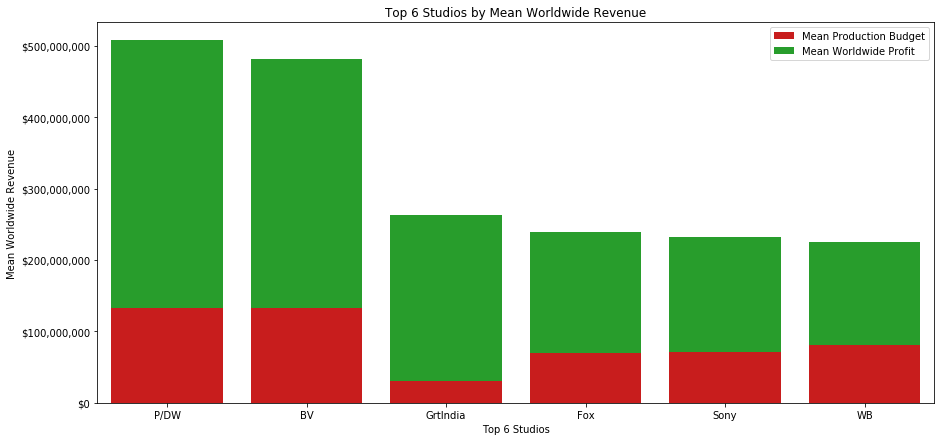

In [266]:
fig = plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=top_6_studios_graph,
                         x='studio',
                         y='production_budget',
                         color=sns.xkcd_rgb["red"],
                         label='Mean Production Budget')

profit_bar = sns.barplot(data=top_6_studios_graph,
                         x='studio',
                         y='profit',
                         bottom=top_6_studios_graph['production_budget'],
                         color=sns.xkcd_rgb["green"],
                         label='Mean Worldwide Profit')

budget_bar.set(xlabel='Top 6 Studios',
              ylabel='Mean Worldwide Revenue',
              title='Top 6 Studios by Mean Worldwide Revenue')
budget_bar.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.legend()
plt.show()
fig.savefig('Figures/Top_6_Studios_by_Mean_Worldwide_Revenue.png')

In [208]:
# Creating DataFrame for plotting the top 6 studios by the product of average_rating and num_votes
top_6_rating_studios = df[['rating_votes', 'studio']].groupby(['studio']).mean().sort_values(
    by=['rating_votes'], ascending=False).head(6)
top_6_rating_studios.reset_index(inplace=True)

In [270]:
top_6_rating_studios

,studio,rating_votes
0,BV,1.785438e+06
1,P/DW,1.513245e+06
2,WB,1.481170e+06
3,Wein.,1.468604e+06
4,Par.,1.355615e+06
5,Fox,1.127539e+06


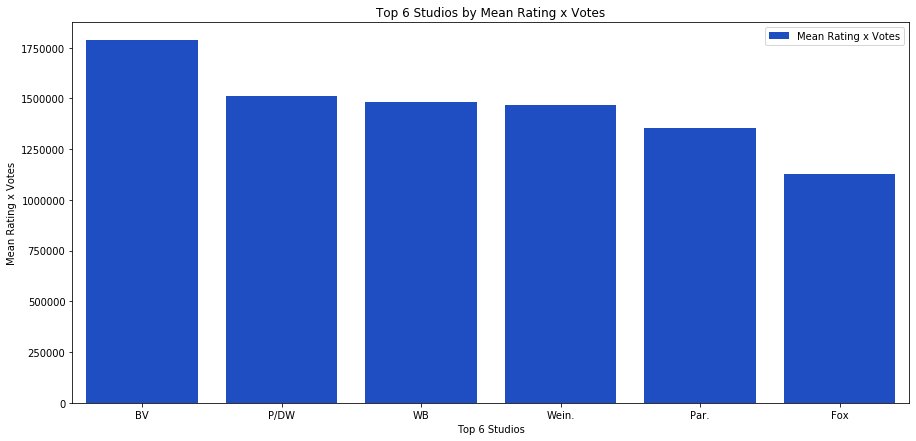

In [267]:
fig = plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=top_6_rating_studios,
                         x='studio',
                         y='rating_votes',
                         color=sns.xkcd_rgb["blue"],
                         label='Mean Rating x Votes')

budget_bar.set(xlabel='Top 6 Studios',
              ylabel='Mean Rating x Votes',
              title='Top 6 Studios by Mean Rating x Votes')

plt.legend()
plt.show()
fig.savefig('Figures/Top_6_Studios_by_Mean_Rating_x_Votes.png')

In [210]:
# Looking at % of movies that are animated for our core 4 studios

In [211]:
core_studios = ['P/DW','BV','Fox','WB']

In [212]:
core_studios_df = df.loc[df.studio.isin(core_studios)]

In [213]:
core_studios_anime_df_tot = core_studios_df[['studio', 'animation']].groupby(
    ['studio']).count()
core_studios_anime_df_tot.rename({'animation': 'total'}, axis=1, inplace=True)

core_studios_anime_df_tru = core_studios_df[['studio', 'animation']].loc[core_studios_df['animation'] == True].groupby(
    ['studio']).count()
core_studios_anime_df_tru.rename({'animation': 'true'}, axis=1, inplace=True)

core_studios_anime_df_fls = core_studios_df[['studio', 'animation']].loc[core_studios_df['animation']== False].groupby(
    ['studio']).count()
core_studios_anime_df_fls.rename({'animation': 'false'}, axis=1, inplace=True)

core_tot_tru_df = core_studios_anime_df_tot.join(core_studios_anime_df_tru, how='left')
core_studios_anime_df = core_tot_tru_df.join(core_studios_anime_df_fls, how='left')

In [214]:
core_studios_anime_df.reset_index(inplace=True)

In [215]:
core_studios_anime_df.true = 100 * core_studios_anime_df.true / core_studios_anime_df.total
core_studios_anime_df.false = 100 * core_studios_anime_df.false / core_studios_anime_df.total

In [216]:
core_studios_anime_df.sort_values(by='true', ascending=False, inplace=True)

In [217]:
core_studios_anime_df.reset_index(inplace=True, drop=True)

In [269]:
core_studios_anime_df

,studio,total,true,false
0,P/DW,10,70.000000,30.000000
1,BV,82,24.390244,75.609756
2,Fox,121,16.528926,83.471074
3,WB,118,7.627119,92.372881


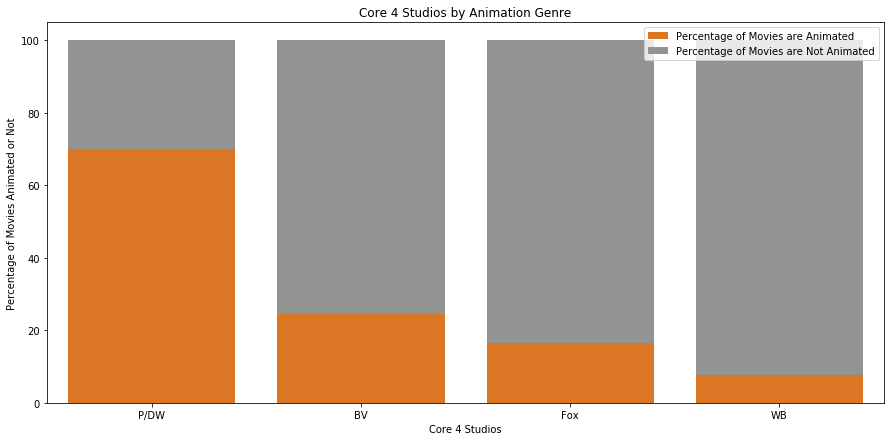

In [268]:
fig = plt.figure(figsize=(15, 7))

true_bar = sns.barplot(data=core_studios_anime_df,
                         x='studio',
                         y='true',
                         color=sns.xkcd_rgb["orange"],
                         label='Percentage of Movies are Animated')

false_bar = sns.barplot(data=core_studios_anime_df,
                         x='studio',
                         y='false',
                         bottom=core_studios_anime_df['true'],
                         color=sns.xkcd_rgb["grey"],
                         label='Percentage of Movies are Not Animated')

true_bar.set(xlabel='Core 4 Studios',
              ylabel='Percentage of Movies Animated or Not',
              title='Core 4 Studios by Animation Genre')

plt.legend()
plt.show()
fig.savefig('Figures/Core_4_Studios_by_Animation_Genre.png')

In [273]:
# Creating DataFrames for a stacked bar plot of all movies of Genre Animation vs. Not-Animation
# with Budget and Profit
df_anime_budget = df[['production_budget', 'animation']].groupby(['animation']).mean()

df_anime_profit = df[['profit', 'animation']].groupby(['animation']).mean()

df_anime_graph = df[['worldwide_gross', 'animation']].groupby(['animation']).mean().sort_values(
    by=['worldwide_gross'], ascending=False)

df_anime_graph = df_anime_graph.join(df_anime_budget, how='left')
df_anime_graph = df_anime_graph.join(df_anime_profit, how='left')

df_anime_graph.reset_index(inplace=True)

In [274]:
# False and True weren't being properly handled by the plotting function as booleans
# False budget and True profit were combined and vice versa
df_anime_graph.animation = df_anime_graph.animation.astype(str)

In [275]:
df_anime_graph

,animation,worldwide_gross,production_budget,profit
0,True,4.060428e+08,1.027151e+08,3.033277e+08
1,False,1.507545e+08,4.820725e+07,1.025473e+08


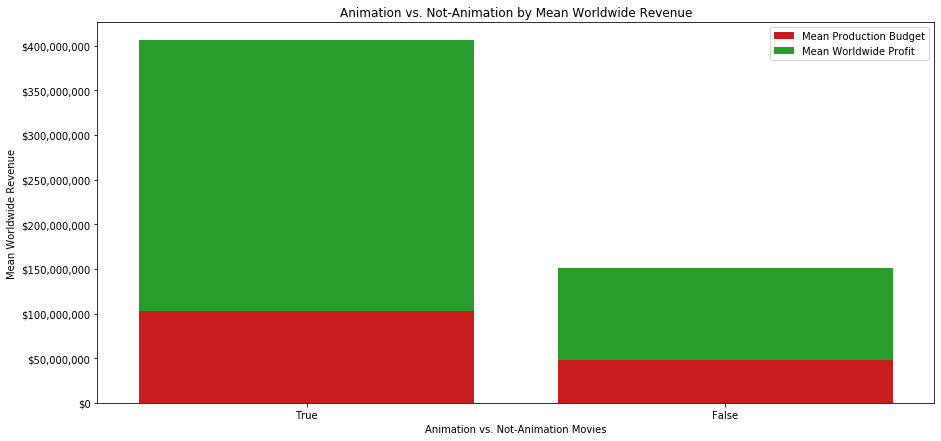

In [276]:
fig = plt.figure(figsize=(15, 7))

anime_budget_bar = sns.barplot(x=df_anime_graph['animation'],
                               y=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["red"],
                               label='Mean Production Budget')

anime_profit_bar = sns.barplot(x=df_anime_graph['animation'],
                               y=df_anime_graph['profit'],
                               bottom=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["green"],
                               label='Mean Worldwide Profit')

anime_budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
                     ylabel='Mean Worldwide Revenue',
                     title='Animation vs. Not-Animation by Mean Worldwide Revenue')
anime_budget_bar.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}'))

plt.legend()
plt.show()
fig.savefig('Figures/Animation_vs_Not-Animation_by_Mean_Worldwide_Revenue.png')

In [277]:
# Creating DataFrame for plotting the Animation vs. Not-Animation by the product of average_rating and num_votes
anime_rating = df[['rating_votes', 'animation']].groupby(['animation']).mean().sort_values(
    by=['rating_votes'], ascending=False)
anime_rating.reset_index(inplace=True)

In [278]:
anime_rating

,animation,rating_votes
0,False,992543.740424
1,True,987023.061290


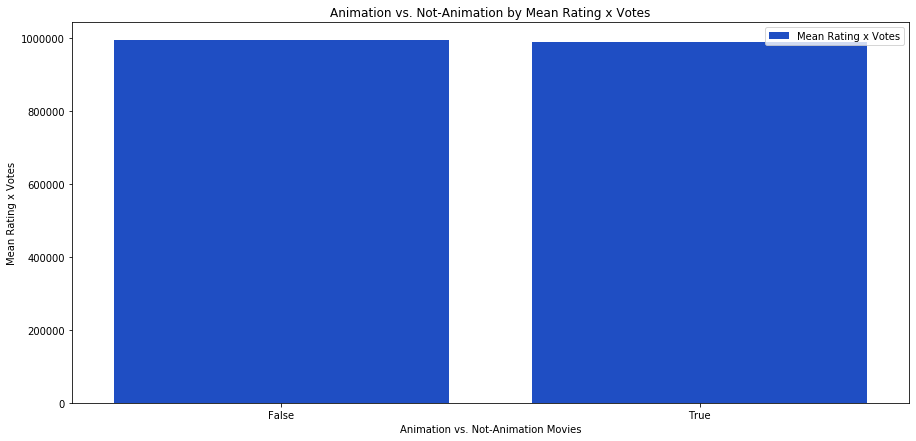

In [279]:
fig = plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=anime_rating,
                         x='animation',
                         y='rating_votes',
                         color=sns.xkcd_rgb["blue"],
                         label='Mean Rating x Votes')

budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
              ylabel='Mean Rating x Votes',
              title='Animation vs. Not-Animation by Mean Rating x Votes')

plt.legend()
plt.show()
fig.savefig('Figures/Animation_vs_Not-Animation_by_Mean_Rating_x_Votes.png')

In [225]:
# Creating DataFrames for a stacked bar plot of all movies of Genre Animation vs. Not-Animation
# with Budget and Profit
df_anime_budget = df[['production_budget', 'action_or_adven_and_anime']].groupby(['action_or_adven_and_anime']).mean()

df_anime_profit = df[['profit', 'action_or_adven_and_anime']].groupby(['action_or_adven_and_anime']).mean()

df_anime_graph = df[['worldwide_gross', 'action_or_adven_and_anime']].groupby(['action_or_adven_and_anime']).mean().sort_values(
    by=['worldwide_gross'], ascending=False)

df_anime_graph = df_anime_graph.join(df_anime_budget, how='left')
df_anime_graph = df_anime_graph.join(df_anime_profit, how='left')

df_anime_graph.reset_index(inplace=True)

In [226]:
# False and True weren't being properly handled by the plotting function as booleans
# False budget and True profit were combined and vice versa
df_anime_graph.action_or_adven_and_anime = df_anime_graph.action_or_adven_and_anime.astype(str)

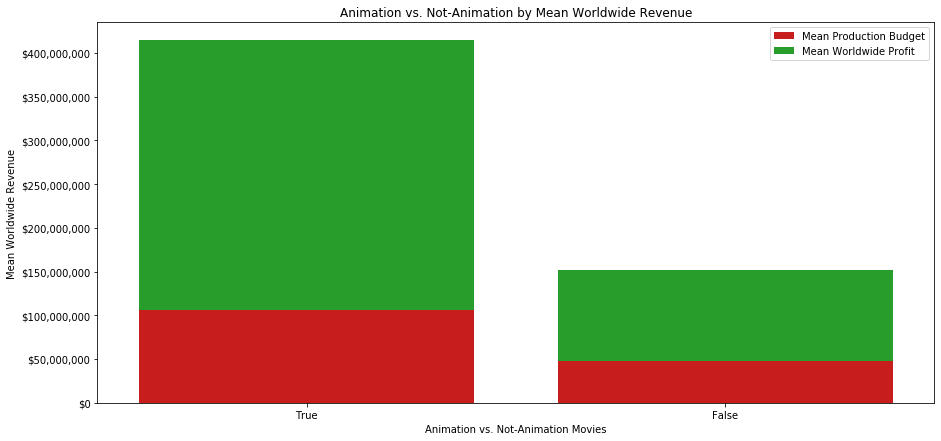

In [227]:
plt.figure(figsize=(15, 7))

anime_budget_bar = sns.barplot(x=df_anime_graph['action_or_adven_and_anime'],
                               y=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["red"],
                               label='Mean Production Budget')

anime_profit_bar = sns.barplot(x=df_anime_graph['action_or_adven_and_anime'],
                               y=df_anime_graph['profit'],
                               bottom=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["green"],
                               label='Mean Worldwide Profit')

anime_budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
                     ylabel='Mean Worldwide Revenue',
                     title='Animation vs. Not-Animation by Mean Worldwide Revenue')
anime_budget_bar.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}'))

plt.legend()
plt.show()

In [259]:
# Creating DataFrame for plotting the top 6 studios by the product of average_rating and num_votes
top_rated_df = df.sort_values(by=['rating_votes'], ascending=False).tail(1150)
top_anime_rating = top_rated_df[['rating_votes', 'action_or_adven_and_anime']].groupby(['action_or_adven_and_anime']).mean().sort_values(
    by=['rating_votes'], ascending=False)
top_anime_rating.reset_index(inplace=True)

In [260]:
top_anime_rating

,action_or_adven_and_anime,rating_votes
0,True,796659.695122
1,False,724957.448127


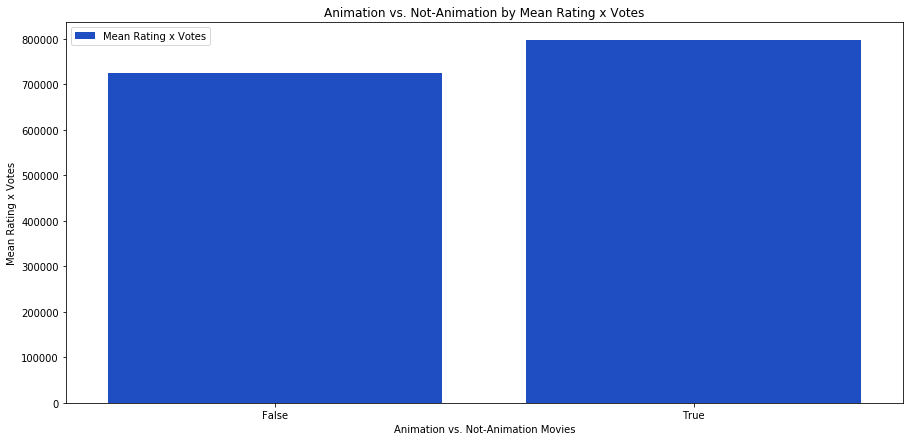

In [261]:
plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=top_anime_rating,
                         x='action_or_adven_and_anime',
                         y='rating_votes',
                         color=sns.xkcd_rgb["blue"],
                         label='Mean Rating x Votes')

budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
              ylabel='Mean Rating x Votes',
              title='Animation vs. Not-Animation by Mean Rating x Votes')

plt.legend()
plt.show()

In [240]:
# Creating DataFrames for a stacked bar plot of all movies of Genre Animation vs. Not-Animation
# with Budget and Profit
df_anime_budget = core_studios_df[['production_budget', 'animation']].groupby(['animation']).mean()

df_anime_profit = core_studios_df[['profit', 'animation']].groupby(['animation']).mean()

df_anime_graph = core_studios_df[['worldwide_gross', 'animation']].groupby(['animation']).mean().sort_values(
    by=['worldwide_gross'], ascending=False)

df_anime_graph = df_anime_graph.join(df_anime_budget, how='left')
df_anime_graph = df_anime_graph.join(df_anime_profit, how='left')

df_anime_graph.reset_index(inplace=True)

In [241]:
# False and True weren't being properly handled by the plotting function as booleans
# False budget and True profit were combined and vice versa
df_anime_graph.animation = df_anime_graph.animation.astype(str)

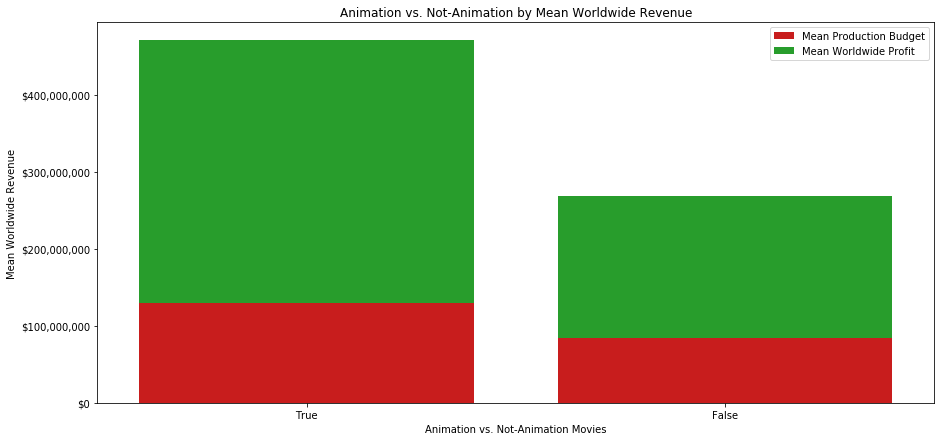

In [242]:
plt.figure(figsize=(15, 7))

anime_budget_bar = sns.barplot(x=df_anime_graph['animation'],
                               y=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["red"],
                               label='Mean Production Budget')

anime_profit_bar = sns.barplot(x=df_anime_graph['animation'],
                               y=df_anime_graph['profit'],
                               bottom=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["green"],
                               label='Mean Worldwide Profit')

anime_budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
                     ylabel='Mean Worldwide Revenue',
                     title='Animation vs. Not-Animation by Mean Worldwide Revenue')
anime_budget_bar.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}'))

plt.legend()
plt.show()

In [244]:
core_studios_df.sort_values(by=['rating_votes'], ascending=False)

,primary_title,runtime_minutes,genres,average_rating,num_votes,directors,writers,studio,year,release_date,...,mystery,romance,sci_fi,sport,thriller,war,western,rating_votes,profit,action_or_adven_and_anime
316,Inception,148.0,"['Action', 'Adventure', 'Sci-Fi']",8.8,1841066.0,nm0634240,nm0634240,WB,2010,2010-07-16,...,False,False,True,False,False,False,False,16201380.8,6.755246e+08,False
302,The Dark Knight Rises,164.0,"['Action', 'Thriller']",8.4,1387769.0,nm0634240,"nm0634300,nm0634240,nm0333060,nm0004170",WB,2012,2012-07-20,...,False,False,False,False,True,False,False,11657259.6,8.094391e+08,False
721,Guardians of the Galaxy,121.0,"['Action', 'Adventure', 'Comedy']",8.1,948394.0,nm0348181,"nm3238648,nm0314153,nm0562554,nm0348181,nm2270...",BV,2014,2014-08-01,...,False,False,False,False,False,False,False,7681991.4,6.008675e+08,False
364,Deadpool,108.0,"['Action', 'Adventure', 'Comedy']",8.0,820847.0,nm1783265,"nm1014201,nm1116660",Fox,2016,2016-02-12,...,False,False,False,False,False,False,False,6566776.0,7.430256e+08,False
328,Mad Max: Fury Road,120.0,"['Action', 'Adventure', 'Sci-Fi']",8.1,780910.0,nm0004306,"nm0004306,nm0565068,nm0490147",WB,2015,2015-05-15,...,False,False,True,False,False,False,False,6325371.0,2.200980e+08,False
802,Gone Girl,149.0,"['Drama', 'Mystery', 'Thriller']",8.1,761592.0,nm0000399,nm5058839,Fox,2014,2014-10-03,...,True,False,False,False,True,False,False,6168895.2,3.075672e+08,False
1080,Avengers: Infinity War,149.0,"['Action', 'Adventure', 'Sci-Fi']",8.5,670926.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",BV,2018,2018-04-27,...,False,False,True,False,False,False,False,5702871.0,1.748134e+09,False
12,Toy Story 3,103.0,"['Adventure', 'Animation', 'Comedy']",8.3,682218.0,nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",BV,2010,2010-06-18,...,False,False,False,False,False,False,False,5662409.4,8.688795e+08,True
380,Gravity,91.0,"['Drama', 'Sci-Fi', 'Thriller']",7.7,710018.0,nm0190859,"nm0190859,nm0190861,nm0000123",WB,2013,2013-10-04,...,False,False,True,False,True,False,False,5467138.6,5.836987e+08,False
1036,The Martian,144.0,"['Adventure', 'Drama', 'Sci-Fi']",8.0,680116.0,nm0000631,"nm1206844,nm1083982",Fox,2015,2015-10-02,...,False,False,True,False,False,False,False,5440928.0,5.472714e+08,False


In [250]:
df['small_rating_votes'] = df.rating_votes / 100000

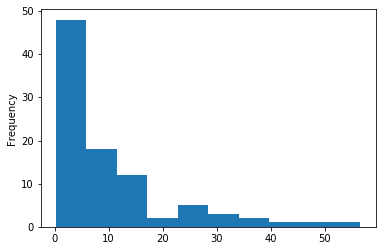

In [251]:
df.small_rating_votes.loc[df['animation']==True].plot.hist(bins=10)

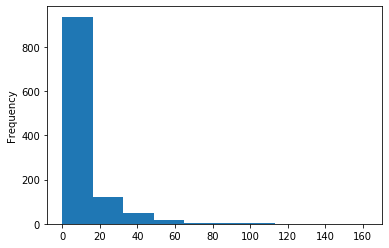

In [252]:
df.small_rating_votes.loc[df['animation']==False].plot.hist(bins=10)

In [256]:
# Creating DataFrame for plotting the top 6 studios by the product of average_rating and num_votes
top_anime_rating = core_studios_df[['rating_votes', 'animation']].groupby(['animation']).mean().sort_values(
    by=['rating_votes'], ascending=False)
top_anime_rating.reset_index(inplace=True)

In [257]:
top_anime_rating

,animation,rating_votes
0,False,992543.740424
1,True,987023.061290


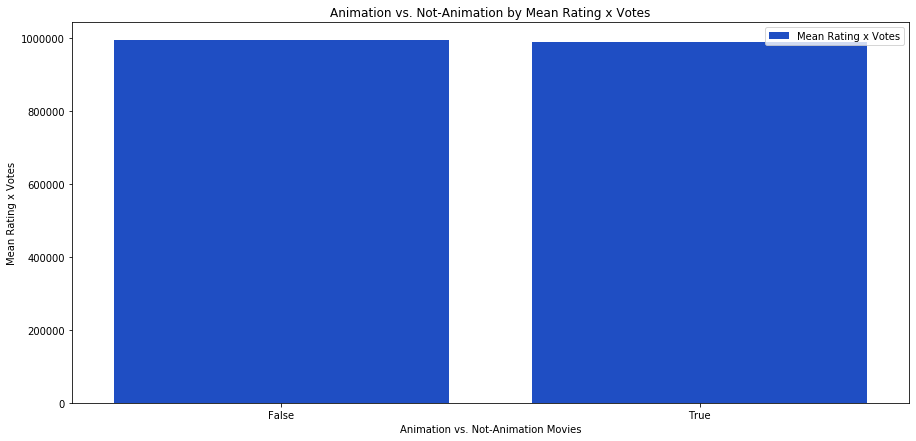

In [258]:
plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=top_anime_rating,
                         x='animation',
                         y='rating_votes',
                         color=sns.xkcd_rgb["blue"],
                         label='Mean Rating x Votes')

budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
              ylabel='Mean Rating x Votes',
              title='Animation vs. Not-Animation by Mean Rating x Votes')

plt.legend()
plt.show()